# AtliQ Hotels Data Analysis Project


# Data import and Exploration

In [1]:
import pandas as pd

In [2]:
df_dates= pd.read_csv("E:\host\dim_date.csv")
df_hotel= pd.read_csv("E:\host\dim_hotels.csv")
df_rooms= pd.read_csv("E:\host\dim_rooms.csv")
df_booking = pd.read_csv("E:/host/bookings.csv")
df_agg = pd.read_csv("E:/host/fact_aggregated_bookings.csv")

In [3]:
df_dates

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [4]:
df_dates.date.dtype

dtype('O')

In [5]:
df_dates['date']= pd.to_datetime(df_dates['date'])

In [6]:
df_dates.date.dtype

dtype('<M8[ns]')

Explore hotels

In [8]:
df_hotel

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [9]:
df_hotel['category'].value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

<Axes: >

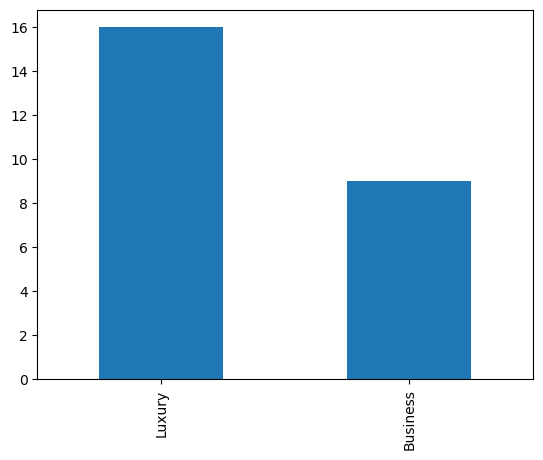

In [10]:
df_hotel['category'].value_counts().plot(kind='bar')

In [11]:
df_hotel.city.value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

<Axes: >

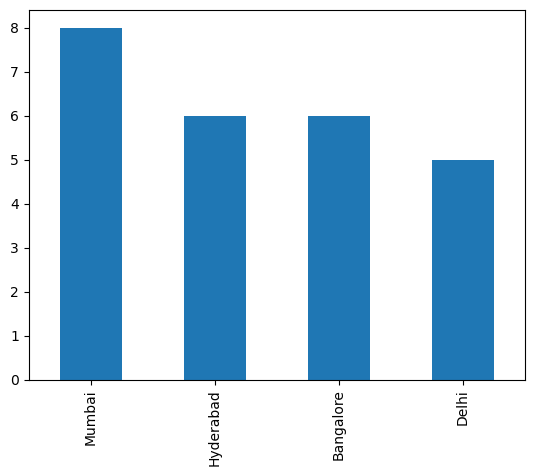

In [12]:
df_hotel.city.value_counts().plot(kind='bar')

Explore rooms

In [13]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


Explore aggregate booking

In [14]:
df_agg

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [15]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [16]:
df_agg['check_in_date']= pd.to_datetime(df_agg['check_in_date']) # convert type of date column from object to datetime

In [17]:
df_agg.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [18]:
df_agg.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [19]:
df_agg.groupby('property_id')['successful_bookings'].sum()#total bookings per property_id

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [20]:
df_agg[df_agg.successful_bookings>df_agg.capacity] #days on which bookings are greater than capacity

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,2022-05-01,RT1,30,19.0
12,16563,2022-05-01,RT1,100,41.0
4136,19558,2022-06-11,RT2,50,39.0
6209,19560,2022-07-02,RT1,123,26.0
8522,19559,2022-07-25,RT1,35,24.0
9194,18563,2022-07-31,RT4,20,18.0


In [21]:
df_agg.capacity.max() # highest capacity

50.0

In [22]:
df_agg[df_agg['capacity']==df_agg.capacity.max()] #properties that have highest capacity

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,2022-05-01,RT2,38,50.0
128,17558,2022-05-02,RT2,27,50.0
229,17558,2022-05-03,RT2,26,50.0
328,17558,2022-05-04,RT2,27,50.0
428,17558,2022-05-05,RT2,29,50.0
...,...,...,...,...,...
8728,17558,2022-07-27,RT2,22,50.0
8828,17558,2022-07-28,RT2,21,50.0
8928,17558,2022-07-29,RT2,23,50.0
9028,17558,2022-07-30,RT2,32,50.0


Explore Bookings

In [23]:
df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [24]:
df_booking.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [25]:
df_booking.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

<Axes: >

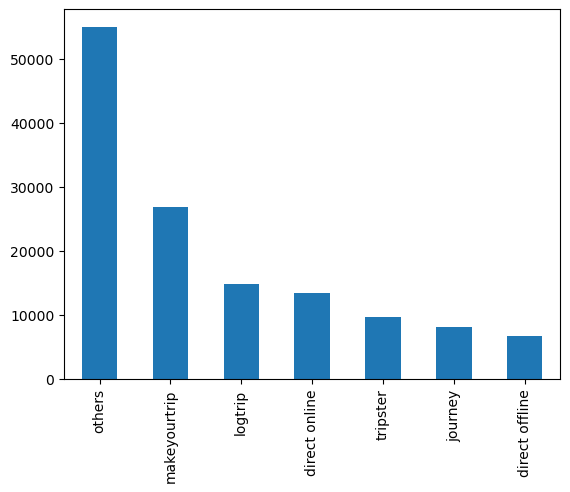

In [26]:
df_booking.booking_platform.value_counts().plot(kind='bar')

In [27]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [28]:
df_booking.booking_status.unique()

array(['Checked Out', 'Cancelled', 'No Show'], dtype=object)

# Data Cleaning

In [29]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [30]:
df_booking = df_booking[df_booking.no_guests>0]

In [31]:
df_booking.shape

(134578, 12)

In [32]:
mean ,std = df_booking.revenue_generated.mean(),df_booking.revenue_generated.std()

In [33]:
mean

15378.036937686695

In [34]:
std

93040.15493143328

In [35]:
upper_limit1 = mean + 3*std

In [37]:
lower_limit1 = mean - 3*std

In [39]:
upper_limit1

294498.50173198653

In [40]:
lower_limit1

-263742.4278566132

In [41]:
df_booking[df_booking['revenue_generated']>upper_limit1]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [43]:
df_booking = df_booking[df_booking['revenue_generated']<=upper_limit1]

In [44]:
df_booking.revenue_generated.describe()

count    134573.000000
mean      14915.959776
std        6452.676164
min        6500.000000
25%        9900.000000
50%       13500.000000
75%       18000.000000
max       45220.000000
Name: revenue_generated, dtype: float64

In [46]:
df_booking.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [48]:
upper_limit2 = df_booking.revenue_realized.mean() + 3*df_booking.revenue_realized.std()
upper_limit2

33479.3586618449

In [49]:
lower_limit2 = df_booking.revenue_realized.mean() - 3*df_booking.revenue_realized.std()
lower_limit2

-8087.391491610155

In [51]:
df_booking[df_booking.revenue_realized>upper_limit2]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [52]:
df_booking[df_booking.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [53]:
#for upper limit is  mean =23439.308444 and std is 9048.599076
# upper limit = mean + 3*std
23439.308444 + 3*9048.599076

50585.105672000005

Here upper limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [54]:
df_booking.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc

In [55]:
df_agg.isnull().sum() # checking in aggregate booking data 

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [58]:
df_agg.capacity.fillna(df_agg.capacity.median(), inplace= True) # filling missing value with median

# Data Transformation

**Create occupancy percentage column**

In [60]:
df_agg.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0


In [68]:
df_agg['occ_pct'] = df_agg.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

In [69]:
df_agg.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.0,0.833333
1,19562,2022-05-01,RT1,28,30.0,0.933333
2,19563,2022-05-01,RT1,23,30.0,0.766667


In [70]:
df_agg['occ_pct'] = df_agg['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.0,83.33
1,19562,2022-05-01,RT1,28,30.0,93.33
2,19563,2022-05-01,RT1,23,30.0,76.67


# Insights Generation

**Average occupancy rate in each of the room categories**

In [72]:
df_agg.groupby("room_category")["occ_pct"].mean()

room_category
RT1    58.232748
RT2    58.040278
RT3    58.028213
RT4    59.300461
Name: occ_pct, dtype: float64

RT1, RT2 etc. not get by anyone so i print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [74]:
df = pd.merge(df_agg, df_rooms, left_on="room_category", right_on="room_id") #merge rooms and aggregate dataset

In [75]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,RT1,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,RT1,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,RT1,Standard
3,17558,2022-05-01,RT1,30,19.0,157.89,RT1,Standard
4,16558,2022-05-01,RT1,18,19.0,94.74,RT1,Standard


In [76]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard
3,17558,2022-05-01,RT1,30,19.0,157.89,Standard


In [77]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.040278
Premium         58.028213
Presidential    59.300461
Standard        58.232748
Name: occ_pct, dtype: float64

Occupancy is high in presidental hotels

**Average occupancy rate per city**

In [78]:
df = pd.merge(df,df_hotel,on='property_id')

In [79]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-02,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-03,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,2022-05-04,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,2022-05-05,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


In [80]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.594207
Delhi        61.606467
Hyderabad    58.144651
Mumbai       57.943142
Name: occ_pct, dtype: float64

Highest is in Delhi

 **Occupancy better on Weekday or Weekend**

In [83]:
df_dates.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [85]:
df = pd.merge(df, df_dates, left_on="check_in_date", right_on="date")

In [86]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,16559,2022-05-01,RT2,35,41.0,85.37,Elite,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
2,16559,2022-05-01,RT3,27,32.0,84.38,Premium,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
3,16559,2022-05-01,RT4,17,18.0,94.44,Presidential,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
4,19562,2022-05-01,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend


In [87]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.82
weekend     74.24
Name: occ_pct, dtype: float64

**In the month of June, the occupancy for different cities**

In [88]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
3100,16559,2022-06-01,RT1,14,30.0,46.67,Standard,Atliq Exotica,Luxury,Mumbai,2022-06-01,Jun 22,W 23,weekeday
3101,16559,2022-06-01,RT2,21,41.0,51.22,Elite,Atliq Exotica,Luxury,Mumbai,2022-06-01,Jun 22,W 23,weekeday
3102,16559,2022-06-01,RT3,15,32.0,46.88,Premium,Atliq Exotica,Luxury,Mumbai,2022-06-01,Jun 22,W 23,weekeday
3103,16559,2022-06-01,RT4,8,18.0,44.44,Presidential,Atliq Exotica,Luxury,Mumbai,2022-06-01,Jun 22,W 23,weekeday


In [89]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.95
Name: occ_pct, dtype: float64

<Axes: ylabel='occ_pct'>

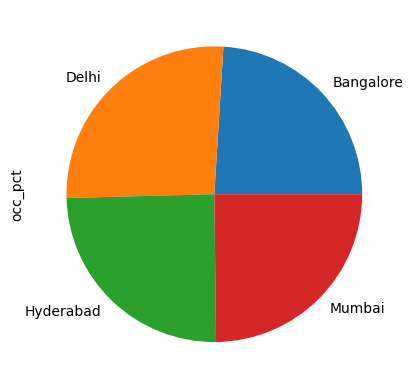

In [90]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).plot(kind='pie',)

**Revenue realized per city**

In [91]:
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [93]:
df_hotel.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [95]:
df_bookings_all = pd.merge(df_booking, df_hotel, on="property_id")

In [96]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [97]:
df_bookings_all.groupby("city")["revenue_realized"].sum().sort_values()

city
Delhi        294404488
Hyderabad    325179310
Bangalore    420383550
Mumbai       668569251
Name: revenue_realized, dtype: int64

Highest from Mumbai

**Month by month revenue**

In [99]:
df_dates.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [100]:
df_dates["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [101]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [104]:
df_dates.info() # checking dtype of date column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [103]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

Dtype of date is object, need to change it

In [105]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])

In [108]:
df_bookings_all = pd.merge(df_bookings_all, df_dates, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [109]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum().sort_values()

mmm yy
Jun 22    377191229
Jul 22    389940912
May 22    408375641
Name: revenue_realized, dtype: int64

Highest in May

**Revenue realized per hotel type**

In [111]:
df_hotel.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [112]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [118]:
df_bookings_all.groupby('property_name')['revenue_realized'].sum().sort_values()

property_name
Atliq Seasons     45920757
Atliq Grands     145860641
Atliq Blu        179203544
Atliq Bay        179416721
Atliq City       196555383
Atliq Palace     209474575
Atliq Exotica    219076161
Name: revenue_realized, dtype: int64

**Average rating per city**

In [120]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.40
Delhi        3.78
Hyderabad    3.66
Mumbai       3.64
Name: ratings_given, dtype: float64

**Pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

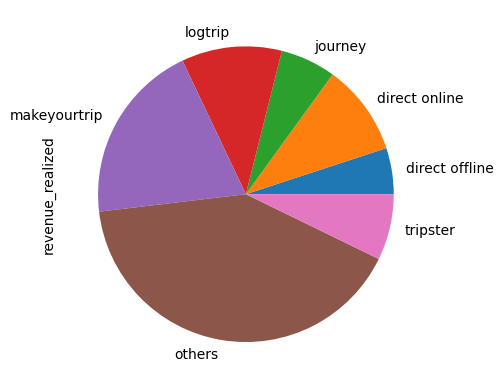

In [121]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")